Background: A dataset from the National Institute of Diabetes and Digestive and Kidney Diseases

Objective: To diagnostically predict whether or not a patient has diabetes based on certain diagnostic measurements

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
pima = pd.read_csv('diabetes.csv')
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


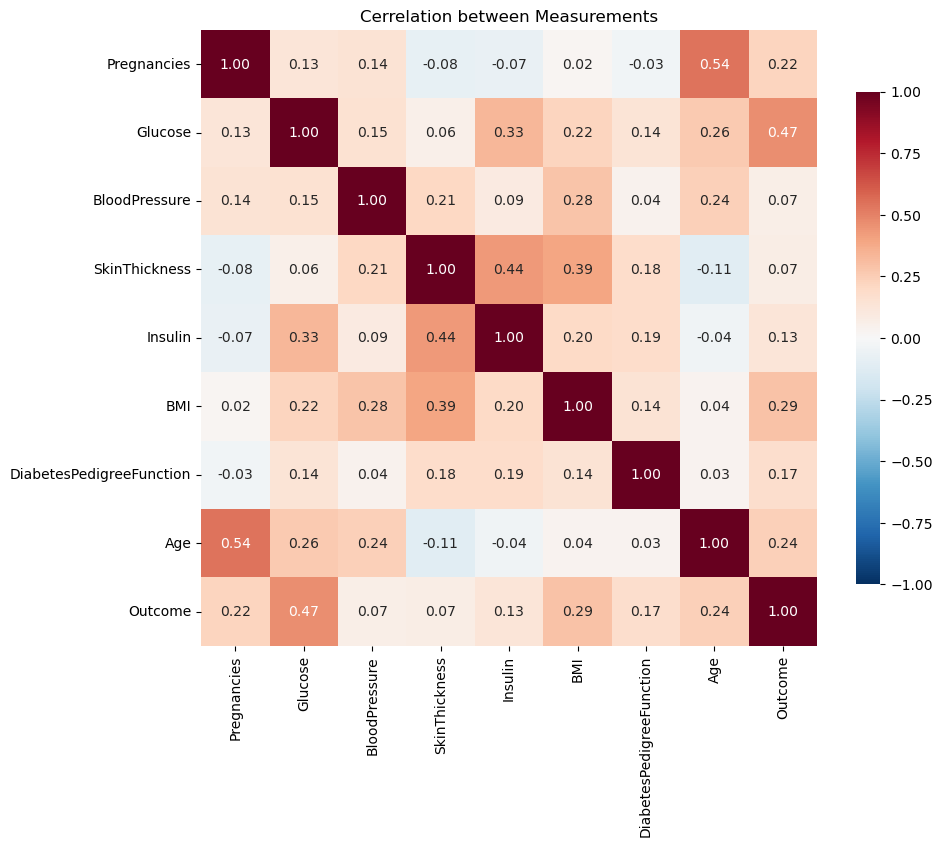

In [3]:
corr = pima.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True,
            fmt='.2f', 
            cmap='RdBu_r', 
            square=True, 
            vmin=-1,
            vmax=1,
            cbar_kws={'shrink': 0.8})  
plt.title('Cerrelation between Measurements')
plt.show()

In [4]:
# divide the columns into two types of variables dependent(or target variable) and independent variable(or feature variables)
X = pima[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] # independent variable
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [5]:
y = pima.Outcome # variables dependent (panda series)
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, # 75% of the data will be for training, 25% of the data will be for test
                                                    random_state=16) # a random number needs to be consistent in the same model

In [7]:
# instantiate the model (using the default parameters)
# logreg = LogisticRegression(solver='liblinear', random_state=16)

# 'balanced' automatically gives more weight to the minority (Diabetes) class
logreg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [8]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[104,  21],
       [ 14,  53]])

- True negative (No Diabetes): 104
- False positive (Type I Error): 21
- False negative (Type II Error): 14
- True positive (Diabetes): 53

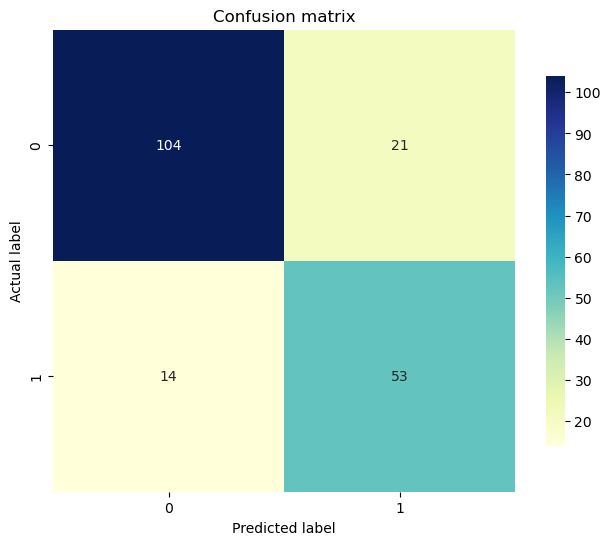

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, 
            annot=True, 
            fmt='.0f', 
            cmap='YlGnBu', 
            square=True, 
            cbar_kws={'shrink': 0.8})  
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [10]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.88      0.83      0.86       125
   with diabetes       0.72      0.79      0.75        67

        accuracy                           0.82       192
       macro avg       0.80      0.81      0.80       192
    weighted avg       0.82      0.82      0.82       192



An 82% accuracy is a strong result for this dataset. It significantly outperforms the 65% baseline and sits at the upper end of what Logistic Regression typically achieves on this data (75-80%). By using a balanced approach, the False Negative risk was reduced to 21%, meaning the model now correctly identifies roughly 8 out of 10 diabetic cases, missing only 2.

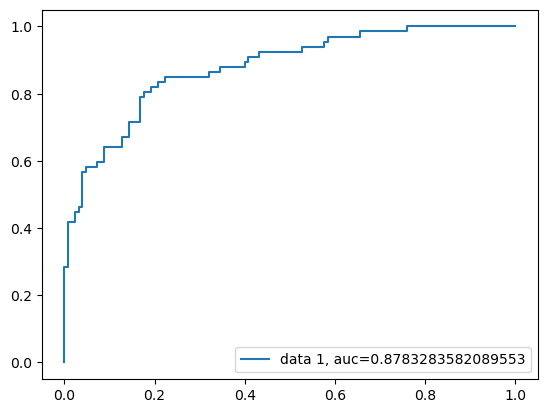

In [11]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for this case is 0.88, meaning that this is a strong classifier.

Key Findings:

1. This analysis produced a highly reliable diagnostic model with 82% overall accuracy, successfully prioritizing patient safety by correctly identifying 79% of diabetic cases (Recall) while maintaining a strong 88% precision for healthy patients.
2. The Macro Average F1-score of 0.80 proves the model isn't biased toward one group over the other; it has truly "learned" the characteristics of both.

Reference: https://www.datacamp.com/tutorial/understanding-logistic-regression-python